In [1]:
# #请先运行此代码块获得代码
# !DATA_PATH=data/data253/ && NEW_NAME=$(find -name *[0-9].ipynb) && NEW_NAME=${NEW_NAME%.*} && NEW_NAME=${NEW_NAME#./} && unzip -o ${DATA_PATH}Bitcoin_LSTM_fluid.zip  && cp -rf Bitcoin_LSTM_fluid/. . && mv Bitcoin_fluid_lstm_complete.ipynb ${NEW_NAME}"_complete.ipynb"                                                                                                     

Archive:  data/data253/Bitcoin_LSTM_fluid.zip
  inflating: Bitcoin_LSTM_fluid/Bitcoin_fluid_lstm_homework.ipynb  
  inflating: Bitcoin_LSTM_fluid/Bitcoin_fluid_lstm_complete.ipynb  
  inflating: Bitcoin_LSTM_fluid/.ipynb_checkpoints/Bitcoin_fluid_lstm_homework-checkpoint.ipynb  
  inflating: Bitcoin_LSTM_fluid/.ipynb_checkpoints/fluid_try-checkpoint.ipynb  
  inflating: Bitcoin_LSTM_fluid/.ipynb_checkpoints/get_BitcoinPrediction-checkpoint.ipynb  
  inflating: Bitcoin_LSTM_fluid/.ipynb_checkpoints/Bitcoin_fluid_lstm_complete-checkpoint.ipynb  
  inflating: Bitcoin_LSTM_fluid/model/lstm_0.w_0  
  inflating: Bitcoin_LSTM_fluid/model/fc_1.b_0  
  inflating: Bitcoin_LSTM_fluid/model/fc_1.w_0  
  inflating: Bitcoin_LSTM_fluid/model/fc_0.b_0  
  inflating: Bitcoin_LSTM_fluid/model/lstm_0.b_0  
  inflating: Bitcoin_LSTM_fluid/model/fc_0.w_0  
  inflating: Bitcoin_LSTM_fluid/model/__model__  
  inflating: Bitcoin_LSTM_fluid/images/Bitcoin.png  
  inflating: Bitcoin_LSTM_fluid/datasets/BitcoinD

In [2]:
# !cp -R /home/aistudio/datasets/ /tmp/    

# Paddlepaddle实现LSTM - 比特币预测

欢迎大家来到这个实验，本实验实现的是利用LSTM (长短期记忆神经网络) 进行比特币价格预测，通过本次实验，你将了解比特币预测的方法、比特币预测的数据集处理技巧、LSTM模型搭建以及训练过程等等，除此之外，你还将看到Paddlepaddle框架实现深度学习的一个十分清晰的结构流程，加深你对Paddlepaddle的了解。

在开始实验之前，我们有必要先来了解一下比特币预测的一些知识，以便对比特币预测实验有一个整体把握。

## 背景知识

我们之前做过关于房价预测的实验，房价预测就是根据影响房价的一些因素(面积，地理位置等等)来构建一个全连接层神经网络并对其函数参数进行训练，最后使得损失函数收敛，这样一来我们就可以得到确切的函数关系式，每给一个输入，便得到一个相应的房价输出，每次的房价输出仅仅与本次的输入有关，而与之前的输入输出没有关系，即房价的数据不构成时间序列。

比特币预测虽然同样是预测类的实验，但却与房价预测有很大的不同，因为我们无法只根据一天的比特币价格数据就能对后面的比特币价格进行预测，换句话说，比特币价格不仅仅与前面一天的数据有关系，还跟以前的比特币价格有关系，这样，比特币价格的数据就构成了一种时间序列，而每次决定比特币预测结果的也不是仅仅是本次的输入，而是过去一段时间的数据序列，所以我们不能像预测房价那样使用全连接层神经网络，而是使用LSTM模型。


简单了解了比特币预测的原理后，我们就可以正式开始实验了。

本次实验分流程如下：

1. 引用库的导入
2. 数据预处理
3. 构造数据读取的Reader
4. 搭建模型
5. 训练模型
6. 预测及可视化
7. 总结

## 1 - 引用库

首先，我们需要加载实验需要用到的一些库，他们分别是：

- numpy：一个python的基本库，用于科学计算
- matplotlib.pyplot：用于生成比特币预测效果图
- paddle.fluid ：PaddlePaddle深度学习框架  
- from __future__ import print_function:在开头加上from __future__ import print_function这句之后，即使在python2.X，使用print就得像   python3.X那样加括号使用.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import paddle
import paddle.fluid as fluid 
from __future__ import print_function

## 2 - 数据预处理

本次实验采用的是网上公开历史比特币价格数据集，数据集包含9列 (样本标签、日期、开盘价、最高价、最低价、闭盘价、交易量、市场总值、第二天的比特币价格) ，共有1623天的比特币价格数据，下图为其中的一部分:
![fig1](./images/Bitcoin.png)

在本实验中，我们利用历史数据中的开盘价、最高价、最低价、闭盘价、交易量、市场总值来对下一日的比特币价格进行预测

数据处理第一步，我们首先需要对文件中我们不需要的数据进行删除，在本实验中，我们可以直接在原数据集文件中删除前两列和第一行，然后保存文件为新的数据集BitcoinDataset.txt。然后我们需要读取剩下的数据：

In [2]:
SAVE_DIRNAME = 'model'
f = open('/tmp/datasets/BitcoinDataset.txt') 
df = f.readlines()    
f.close()

下面的代码把数据整理成我们需要的数组形式并保存在data中，形状为1623×7

In [3]:
data = []
for line in df:
    data_raw = line.strip('\n').strip('\r').split('\t') #这里data_raw是列表形式，代表一行数据样本
    data.append(data_raw)#data为二维列表形式
data = np.array(data, dtype='float32')

在数据整理完成以后，我们可以查看一下数据信息，例如数据的类型、数据的个数、形状等等。

### 练习：输出处理完成的数据的类型、个数、形状以及数据的第一行。

In [4]:
###完成此处代码，获得期望输出###
## START CODE HERE ###
print("数据类型:"+str(type(data)))
print("数据个数:"+str(data.shape[0]))
print("数据形状:"+str(data.shape))
print("数据第一行:"+str(data[0]))
### END CODE HERE ###

数据类型:<type 'numpy.ndarray'>
数据个数:1623
数据形状:(1623, 7)
数据第一行:[7.62597e+03 7.68043e+03 7.50201e+03 7.65398e+03 4.69226e+09 1.30000e+11
 7.65398e+03]


### 期望输出：

数据类型： <type 'numpy.ndarray'><br/>
数据个数： 1623<br/>
数据形状： (1623, 7)<br/>
数据第一行： [7.62597e+03 7.68043e+03 7.50201e+03 7.65398e+03 4.69226e+09 1.30000e+11
 7.65398e+03]


接下来，我们需要将数据进行分割，由于数据量为1623，不是很大，通常按照8:2的比例来划分训练集和数据集，这里将前1298组数据作为训练集，后面325组数据作为测试集。

### 练习：完成以下训练集和数据集的分割代码

In [5]:
ratio = 0.8
DATA_NUM = len(data)

train_len = int(DATA_NUM * ratio)
test_len = DATA_NUM - train_len

### START CODE HERE ###(≈ 2 lines of code)
train_data=data[:train_len,:]
test_data=data[train_len:,:]

### END CODE HERE ###

由于每条数据样本的6个输入特征的取值范围大小不一，因此这里实现特征的归一化操作

### 练习：完成归一化    
result_data = (data - avg) / (max_ - min_) 

In [6]:
# 归一化 
def normalization(data):
    avg = np.mean(data, axis=0)#axis=0表示按数组元素的列对numpy取相关操作值
    max_ = np.max(data, axis=0)
    min_ = np.min(data, axis=0)

### START CODE HERE ###(≈ 1 lines of code)    
    result_data=(data-avg)/(max_-min_)
### END CODE HERE ###    
    return result_data
    

In [7]:
train_data = normalization(train_data)
test_data = normalization(test_data)

## 3 - 构造Reader

首先来介绍一下paddlepaddle的reader机制：

- **作用**：构造train_reader()函数，来读取训练数据集train_set或者测试数据集test_set。
- **用法**：具体实现是在read_data()函数内部构造一个reader()，使用yield关键字来让reader()成为一个Generator（生成器），注意，yield关键字的作用和使用方法类似return关键字，不同之处在于yield关键字可以构造生成器（Generator）。
- **优势**：虽然我们可以直接创建一个包含所有数据的列表，但是由于内存限制，我们不可能创建一个无限大的或者巨大的列表，并且很多时候在创建了一个百万数量级别的列表之后，我们却只需要用到开头的几个或几十个数据，这样造成了极大的浪费，而生成器的工作方式是在每次循环时计算下一个值，不断推算出后续的元素，不会创建完整的数据集列表，从而节约了内存使用。

关于Reader机制更加详细的介绍，可以参看此博客：

In [8]:
def my_train_reader():
    def reader():
        for temp in train_data:
            yield temp[:-1],temp[-1:]
### START CODE HERE ###(≈ 1 lines of code)
#用yield语句完成训练数据的读取功能

### END CODE HERE ###(≈ 1 lines of code)
    return reader

def my_test_reader():
    def reader():
        for temp in test_data:
            yield temp[:-1],temp[-1:]
### START CODE HERE ###(≈ 1 lines of code)
#用yield语句完成测试数据的读取功能            

### END CODE HERE ###(≈ 1 lines of code)    
    return reader

由于比特币各个feature之间的数据差异比较大，所以在上面划分数据集的操作中使用了归一化操作，如此可以提高模型的精度以及加快模型的收敛速度。关于归一化的一些知识可以参看以下博客：    
http://blog.csdn.net/lvweiyimi2b/article/details/54694351

至此，数据预处理完成，在这一部分，我们可以看到，数据预处理是程序的最基础部分，我们需要掌握一些数据处理的技巧来使接下来的模型训练减少很多不必要的问题甚至错误。

### 练习：train_reader的定义

train_reader = paddle.batch( )

In [9]:
# 定义batch
BATCH_SIZE=16
### START CODE HERE ###(≈ 1 lines of code)
# train_reader = paddle.batch(
#     paddle.reader.shuffle(
#         my_train_reader(), 
#         buf_size=500),
#     batch_size=BATCH_SIZE)
#输入的是序列，所以不能打乱

train_reader=paddle.batch(my_train_reader(),batch_size=BATCH_SIZE)
### END CODE HERE ###(≈ 1 lines of code)    

PaddleFluid 模型通过fluid.layers.data 来接收输入数据。图像分类网络以图片以及图片对应的类别标签作为网络的输入。


word = fluid.layers.data(

name= "current_word", shape=[ 1], dtype= "int64", lod_level= 1)

lbl = fluid.layers.data(

name= "next_word", shape=[ 1], dtype= "int64", lod_level= 1)
1. 定义 data layer 的核心是指定输入 Tensor 的形状（shape ）和类型。
2. RNN LM 使用 one-hot 作为输入，一个词用一个和字典大小相同的向量表示，每一个位置对应了字典中的 一个词语。one-hot 向量仅有一个维度为 1， 其余全部为 0。因此为了节约存储空间，通常都直接用一个整型数表示给出词语在字典中的 id，而不是真的创建一个和词典同样大小的向量 ，因此在上面定义的 data layer 中word 和lbl 的形状都是 1，类型是int64 。
3. 需要特别说明的是，实际上word 和lbl 是两个[batch_size x 1] 的向量，这里的batch size 是指一个 mini-batch 中序列中的总词数。对序列学习任务， mini-batch 中每个序列长度 总是在发生变化，因此实际的batch_size 只有在运行时才可以确定。batch size 总是一个输入 Tensor 的第 0 维，在 PaddleFluid 中指定 data layer 的 shape 时，不需要指定batch size 的大小，也不需要考虑占位。框架会自动补充占位符，并且在运行时 设置正确的维度信息。因此，上面的两个 data layer 的 shape 都只需要设置第二个维度，也就是 1。

https://www.sohu.com/a/239163488_500659

## 4 - 搭建模型
在完成了数据预处理与Reader的构造等基础工程之后，我们就可以正式进入LSTM模型的搭建流程了。

### fluid.layers.data
- 参数:	
- name (str) – The name/alias of the function
- shape (list) – Tuple declaring the shape.数组声明形状
- dtype (int|float) – The type of data : float32, float_16, int etc
- lod_level (int) – The LoD Level. 0 means the input data is not a sequence.
- 返回:	
The global variable that gives access to the data.
- 返回类型:	
Variable
- examples<br/>
data = fluid.layers.data(name='x', shape=[784], dtype='float32')

### fluid.layers.fc
- input (Variable|list of Variable) – The input tensor(s) of this layer, and the dimension of the input tensor(s) is at least 2.
- size (int) – The number of output units in this layer.
- 返回:	
The transformation result.
- 返回类型:	
Variable
- examples<br/>
data = fluid.layers.data(name="data", shape=[32, 32], dtype="float32")<br/>
fc = fluid.layers.fc(input=data, size=1000, act="tanh")
### fluid.layers.dynamic_lstm
- input (Variable) – (LoDTensor) the first input is a LodTensor, which support variable-time length input sequence. The underlying tensor in this LoDTensor is a matrix with shape (T X 4D), where T is the total time steps in this mini-batch, D is the hidden size
- size (int) – 4 * hidden size.
- is_reverse (bool) – (bool, defalut: False) whether to compute reversed LSTM
- examples<br/>
hidden_dim = 512<br/>
forward_proj = fluid.layers.fc(input=input_seq, size=hidden_dim \* 4,act=None, bias_attr=None) <br/>
forward, _ = fluid.layers.dynamic_lstm(input=forward_proj, size=hidden_dim \* 4, use_peepholes=False)
### fluid.layers.sequence_pool
- input (variable) – The input variable which is a LoDTensor.
- pool_type (string) – The pooling type of sequence_pool. It supports average, sum, sqrt and max.
- 返回:	
The sequence pooling variable which is a Tensor.
- examples<br/>
x is a 1-level LoDTensor:<br/>
x.lod = [[2, 3, 2]]<br/>
x.data = [1, 3, 2, 4, 6, 5, 1]<br/>
x.dims = [7, 1]<br/>
then output is a Tensor:<br/>
out.dim = [3, 1]<br/>
with condition len(x.lod[-1]) == out.dims[0]<br/>
max    : out.data = [3, 6, 5], where 3=max(1,3), 6=max(2,4,6), 5=max(5,1)'''<br/>
直观理解就是把[1,3,2,4,6,5,1]按[2,3,2]分成了[1,3],[2,4,6],[5,1]，再取max值

### 练习：根据以上API完成LSTM模型搭建

为什么size=dim \* 4?<br/>
为什么不设激活函数？？

In [10]:
DIM = 1
hid_dim2 = 1

### START CODE HERE ###(≈ 7 lines of code)
# input_seq=fluid.layers.data(name="input_seq",shape=，dtype="float32")
# forward_proj = fluid.layers.fc(input=input_seq, size=hidden_dim 4,act=None, bias_attr=None)
# forward, _ = fluid.layers.dynamic_lstm(input=forward_proj, size=hidden_dim 4, use_peepholes=False)

x = fluid.layers.data(name='x', shape=[DIM], dtype='float32', lod_level=1)  #lod_level=0表示0 means the input data is not a sequence
#shape为1，这是这么一个机制，每次灌进去的不是9个数字，二是一个个的01(字符串)
label = fluid.layers.data(name='y', shape=[1], dtype='float32')

# Lstm layer
fc0 = fluid.layers.fc(input=x, size=DIM * 4)
lstm_h, c = fluid.layers.dynamic_lstm(
    input=fc0, size=DIM * 4, is_reverse=False)

# max pooling layer
lstm_max = fluid.layers.sequence_pool(input=lstm_h, pool_type='max')

lstm_max_tanh = fluid.layers.tanh(lstm_max)

# full connect layer
prediction = fluid.layers.fc(input=lstm_max_tanh, size=hid_dim2, act='tanh')





### END CODE HERE ###

cost = fluid.layers.square_error_cost(input=prediction, label=label)
avg_cost = fluid.layers.mean(x=cost)
#定义的是一种模式，可以在下边被使用

In [11]:
from paddle.v2.plot import Ploter
train_title = "Train cost"
test_title = "Test cost"
plot_cost = Ploter(train_title, test_title)

### fluid.default_startup_program() 
Get default/global startup program.<br/>
The layer function in fluid.layers will create parameters, readers, NCCL handles as global variables.<br/> 
The startup_program will initialize them by the operators in startup program. <br/>
The layer function will append these initialization operators into startup program.<br/>
This method will return the default or the current startup program.<br/>
Users can use fluid.program_guard to switch program.<br/>
- 返回:	startup program
- 返回类型:	Program
### fluid.DataFeeder
- 参数:	
- feed_list (list) – The Variables or Variables’name that will feed into model.
- place (Place) – place indicates feed data into CPU or GPU, if you want to feed data into GPU, 
please using fluid.CUDAPlace(i) (i represents the GPU id), or if you want to feed data into CPU,
please using fluid.CPUPlace().
- program (Program) – The Program that will feed data into, if program is None, it will use default_main_program(). Default None.
###  fluid.io.save_inference_model
- 参数
- dirname (str) – The directory path to save the inference model.
- feeded_var_names (list[str]) – Names of variables that need to be feeded data during inference.
- target_vars (list[Variable]) – Variables from which we can get inference results.
- executor (Executor) – The executor that saves the inference model.

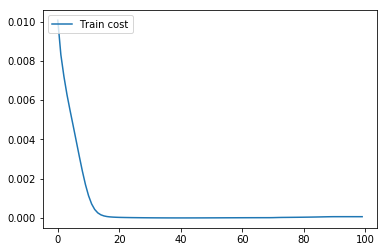

<Figure size 432x288 with 0 Axes>

In [12]:
# 定义优化器
sgd_optimizer = fluid.optimizer.Adam(learning_rate=0.001)
sgd_optimizer.minimize(avg_cost)
#双层for循环写法：



# 参数初始化
place = fluid.CPUPlace()
# place = fluid.CUDAPlace(1)
exe = fluid.Executor(place)#Python中的一个执行器，只支持单个GPU运行。
exe.run( fluid.default_startup_program() )#获取默认/全局启动程序,并由执行器执行
feeder = fluid.DataFeeder(place=place, feed_list=[x, label])
# 定义双层循环
def train_loop():
    step = 0 # 画图用
    PASS_NUM = 100
    for pass_id in range(PASS_NUM):
        total_loss_pass = 0#初始化每一个epoch的损失值初始值为0
        for data in train_reader(): #data表示batch大小的数据样本          
            avg_loss_value, = exe.run(
                fluid.default_main_program(), 
                feed= feeder.feed(data), 
                fetch_list=[avg_cost])
            total_loss_pass += avg_loss_value#计算每个epoch的总损失值

        # 画图
        plot_cost.append(train_title, step, avg_loss_value)
        step += 1
        plot_cost.plot()
    fluid.io.save_inference_model(SAVE_DIRNAME, ['x'], [prediction], exe)

train_loop()

###  fluid.create_lod_tensor
- 参数:	
- data (numpy.ndarray|list|LoDTensor) – a numpy array or a LoDTensor or a list holding the data to be copied.
- recursive_seq_lens (list) – a list of lists indicating the length-based level of detail info specified by the user.
- place (Place) – CPU or GPU place indicating where the data in the new LoDTensor will be stored.
- 返回:	A fluid LoDTensor object with tensor data and recursive_seq_lens info
- examples<br/>
Suppose we want LoDTensor to hold data for sequences of word, where each word is represented by an integer. <br/>If we want to create a LoDTensor to represent two sentences, one of 2 words, and one of 3 words.
Then data can be a numpy array of integers with shape (5, 1). recursive_seq_lens will be [[2, 3]], indicating the length(# of words) in each sentence. This length-based recursive_seq_lens [[2, 3]]

In [17]:
aa=np.random.randint(5,size=(4,3))

In [22]:
# aa.reshape((-1,1))

In [66]:
#paddlepaddle就认准tensor格式 
def convert2LODTensor(temp_arr, len_list):
    temp_arr = np.array(temp_arr) 
    temp_arr = temp_arr.flatten().reshape((-1, 1))#把325个测试样本的array平坦化到一维数据[1950,1]的格式
    
    #flatten平坦化到一维
    #reshape 搞成相应格式
    
    print(temp_arr.shape)
    return fluid.create_lod_tensor(
        data=temp_arr,#对测试样本来说这里表示325个样本的平坦化数据列表，维度为[1950,1]
        recursive_seq_lens =[len_list],#对于测试样本来说这里全是6，所以为325 个6的列表
        place=fluid.CPUPlace()
        )#返回：A fluid LoDTensor object with tensor data and recursive_seq_lens info
    

    
   
def get_tensor_label(mini_batch):  
    tensor = None
    labels = []
    
    temp_arr = []
    len_list = []
    for _ in mini_batch:   #mini_batch表示的大小为325个测试样本数据
        labels.append(_[1]) #收集 label----y----------1维
        temp_arr.append(_[0]) #收集序列本身--x---------6维
        len_list.append(len(_[0])) #收集每个序列x的长度,和上边x的维度对应，这里全为6
    tensor = convert2LODTensor(temp_arr, len_list)    
    return tensor, labels

my_tensor = None
labels = None

# 定义batch
test_reader = paddle.batch(
    my_test_reader(),
    batch_size=325)#一次性把样本取完


for mini_batch in test_reader():
    my_tensor,labels = get_tensor_label(mini_batch)#其实就是变成tensor格式的x和y
    break
   


(1950, 1)


### fluid.io.load_inference_model	
- 参数：
- dirname (str) – The directory path
- executor (Executor) – The executor to run for loading inference model.
- 返回:	
The return of this function is a tuple with three elements: (program, feed_target_names, fetch_targets). The program is a Program, it’s the program for inference. The feed_target_names is a list of str, it contains Names of variables that need to feed data in the inference program. The fetch_targets is a list of Variable. It contains variables from which we can get inference results.
- 返回类型:	
tuple<br/>
这个函数的返回是一个元组，有三个元素：（1）推断程序，（2）需要在推理程序中提供数据的变量的名称，
（3）The fetch_targets is a list of Variable. It contains variables from which we can get inference results

In [67]:
place = fluid.CPUPlace()
exe = fluid.Executor(place)
inference_scope = fluid.core.Scope()
with fluid.scope_guard(inference_scope):#更改全局/默认作用域实例。运行时的所有变量将分配给新的作用域。
    [inference_program, feed_target_names, fetch_targets] = (
        fluid.io.load_inference_model(SAVE_DIRNAME, exe))
    results = exe.run(inference_program,
                      feed= {'x': my_tensor}, #{feed_target_names[0]:my_tensor },和上面保存模型时统一
                      fetch_list=fetch_targets)
#     print("infer results: ", results[0])
#     print("ground truth: ", labels)
#load_inference_model解释件上面api解释


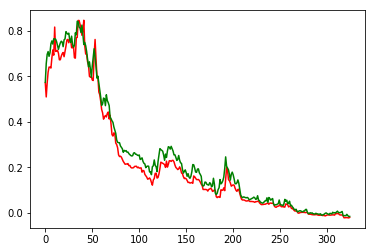

In [68]:
result_print = results[0].flatten()
plt.figure()
plt.plot(list(range(len(labels))), labels, color='r')  #红线为真实值
plt.plot(list(range(len(result_print))), result_print, color='g')  #绿线为预测值
plt.show()